In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy.misc import imsave
import imageio

from keras import applications
import pydicom, os
pydicom.config.image_handlers = ['gdcm_handler']

from keras.models import Sequential
from keras.layers import *
dataset_location = './datasets'
dicom_image_location = "{}/train_images/".format(dataset_location)
print(os.listdir(dataset_location))


Using TensorFlow backend.


['train_images', 'stage_2_detailed_class_info.csv', 'stage_2_train_labels.csv', 'test_images']


In [2]:
# Set Seed|
np.random.seed(324)

In [3]:
# Helper Functions
def patient_id(list_index):
    return list(df.iloc[[55]].patientId)[0]

def plot_squares(np_img, squares_list):
    pass

In [4]:
df = pd.read_csv("{}/stage_2_detailed_class_info.csv".format(dataset_location))

In [5]:
df.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [6]:
display(df["class"].value_counts())
display("{} Total number of records".format(len(df)))
display("{} Unique patient Ids".format(len(df["patientId"].unique())))

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

'30227 Total number of records'

'26684 Unique patient Ids'

In [7]:
df_train = pd.read_csv('{}/stage_2_train_labels.csv'.format(dataset_location))

In [8]:
display(df_train.head())
display("Number of records: {}".format(len(df_train)))
display(df_train.describe())
display(df_train["Target"].value_counts())
print("{} Total number of records".format(len(df_train)))
print("{} Unique patient Ids".format(len(df_train["patientId"].unique())))

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


'Number of records: 30227'

,x,y,width,height,Target
count,9555.000000,9555.000000,9555.000000,9555.000000,30227.000000
mean,394.047724,366.839560,218.471376,329.269702,0.316108
std,204.574172,148.940488,59.289475,157.750755,0.464963
min,2.000000,2.000000,40.000000,45.000000,0.000000
25%,207.000000,249.000000,177.000000,203.000000,0.000000
50%,324.000000,365.000000,217.000000,298.000000,0.000000
75%,594.000000,478.500000,259.000000,438.000000,1.000000
max,835.000000,881.000000,528.000000,942.000000,1.000000


0    20672
1     9555
Name: Target, dtype: int64

30227 Total number of records
26684 Unique patient Ids


In [9]:
image_file = "{}.dcm".format(patient_id(35))

"type: <class 'numpy.ndarray'>"

'image size: (1024, 1024)'

Value at single pixel: 400, 235: 120


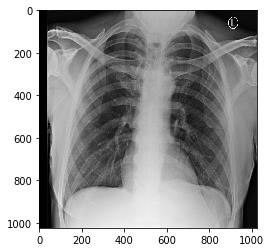

In [11]:
dcm = pydicom.read_file(dicom_image_location+image_file)
image = dcm.pixel_array
display("type: {}".format(type(image)))
display("image size: {}".format(image.shape))
print("Value at single pixel: 400, 235: {}".format(image[400][235]))

plt.imshow(image, cmap=plt.cm.gist_gray)

(array([42883.,  6331.,  6452., 12539., 16786.,  2340.,  1375.,  1777.,
         1253.,  2026.,  2534.,  2587.,  5327.,  4423.,  7950.,  6183.,
         9917.,  6684., 10217.,  7589., 11997., 12648.,  8795., 13972.,
         9333., 14122.,  9822., 16254., 11365., 17129., 17126., 10987.,
        16013., 10589., 14969.,  9383., 13436.,  8876., 13524.,  9236.,
        14008., 13574.,  8919., 13212.,  8577., 13085.,  8973., 14133.,
         9841., 15671., 16147., 10852., 17653., 13298., 20220., 12878.,
        18793., 11884., 17321., 11890., 17403., 17619., 11414., 15942.,
        10168., 16007., 11239., 18437., 13303., 17949., 20057., 15589.,
        19688., 11124., 13841.,  8138., 10710.,  6480.,  8838.,  5455.,
         8958.,  9539.,  6383.,  9034.,  6218.,  8248.,  4993.,  8486.,
         5882.,  9821.,  8535.,  4835.,  6375.,  2616.,   878.,   131.,
          103.,    72.,   117.,   273.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95

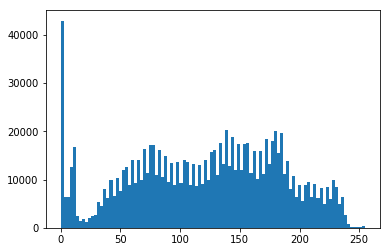

In [12]:
display(plt.hist(image.ravel(), bins=100))

In [13]:
training_image_output_path = "{}/train_pngs"

In [14]:
imageio.imwrite("myimage.png", image)

In [15]:
dicom_files = os.listdir(dicom_image_location)
print("Total x-rays: {}".format(len(dicom_files)))
print("Unique patient ids: {}".format(len(df["patientId"].unique())))

Total x-rays: 26142
Unique patient ids: 26684


In [16]:
patient_id_dict = {}
patients_without_xrays = {}

In [17]:
for item in dicom_files:
    patient_id_dict[item.split(".")[0]] = True

In [18]:
for item in df["patientId"]:
 if item not in patient_id_dict:
    patients_without_xrays[item] = True

In [26]:
print("Patients with missing x-rays: {}".format(len(patients_without_xrays)))

Patients with missing x-rays: 542


In [20]:
# Remove patientId's with missing xrays.
print(len(df))
df = df[~df.patientId.isin(patients_without_xrays)]
len(df)

30227


29566

In [24]:
# check if removal worked
test_patients_without_xrays = {}
for item in df["patientId"]:
 if item not in patient_id_dict:
    test_patients_without_xrays[item] = True
print("Patients with missing xrays: {}".format(len(test_patients_without_xrays)))

Patients with missing xrays: 0


In [22]:
# Remove patientId's with missing xrays.
print(len(df_train))
df_train = df_train[~df_train.patientId.isin(patients_without_xrays)]
len(df_train)



30227


29566

In [25]:
# check if removal worked
test_patients_without_xrays = {}
for item in df_train["patientId"]:
 if item not in patient_id_dict:
    test_patients_without_xrays[item] = True
print("Patients with missing xrays: {}".format(len(test_patients_without_xrays)))

Patients with missing xrays: 0
